Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
PYTHONOPTIMIZE=1

In [2]:
from random import random, seed
from itertools import product, accumulate
import numpy as np
from matplotlib import pyplot as plt

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [3]:
samples = 6
UNIVERSE_SIZE = [100, 1_000, 10_000, 100_000, 100_000, 100_000]
NUM_SETS = [10, 100, 1_000, 10_000, 10_000, 10_000]
DENSITY = [0.2, 0.2, 0.2, 0.1, 0.2, 0.3]

rng = list()
for i in range(samples):
    rng.append(np.random.Generator(np.random.PCG64([UNIVERSE_SIZE[i], NUM_SETS[i], int(10_000 * DENSITY[i])])))

T_MAX = 500
# BUFFER_SIZE = []

In [9]:
# This is a test to highlight the performances
# Notes: In the first version i wrongly write the if statement to choose the step_range, so the images for
# Instance 1 and 4 are taken from another file

SETS = list()
COSTS = list()

for i in range(samples):
    SETS.append(np.random.random((NUM_SETS[i], UNIVERSE_SIZE[i])) < DENSITY[i])
    for s in range(UNIVERSE_SIZE[i]):
        if not np.any(SETS[i][:, s]):
            SETS[i][np.random.randint(NUM_SETS[i]), s] = True
    COSTS.append(np.pow(SETS[i].sum(axis=1), 1.1))

## Helper Functions

In [6]:
def valid(solution, i):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype = np.all(np.logical_or.reduce(SETS[i][solution]))
    return phenotype

# instead of (V/nV, -cost), (#covered, -cost) and maximize covered and after minimize cost
def cardinality(solution, i):
    phenotype = np.logical_or.reduce(SETS[i][solution])
    return np.sum(phenotype)

def cost(solution, i):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[i][solution].sum()

#added here the fitness function for clarity
def fitness(solution: np.ndarray, instance: int):
    return (cardinality(solution, instance), -cost(solution, instance))

## Have Fun!

In [7]:
def single_mutation(solution: np.ndarray, instance) -> np.ndarray: # solution will be a numpy array, so py will check the type correcness
    new_solution = solution.copy()
    # we want to select a random bit and change it
    # i suppose it can be optimized with a check ( do not tweak to 0 when it removes an imporant set )
    index = rng[instance].integers(0, NUM_SETS[instance])
    new_solution[index] = not new_solution[index]
    return new_solution

## Hill Climbing with single mutation

ic| sol_fitness: (np.int64(100), np.float64(-316.63114796520813))
ic| fitness(solution, instance): (np.int64(100), np.float64(-316.63114796520813))
    last_step: 0
ic| sol_fitness: (np.int64(1000), np.float64(-34070.475188313))
ic| fitness(solution, instance): (np.int64(1000), np.float64(-7603.050874685517))
    last_step: 230
ic| sol_fitness: (np.int64(10000), np.float64(-4279700.68410978))
ic| fitness(solution, instance): (np.int64(10000), np.float64(-137692.88138971548))
    last_step: 4899
ic| sol_fitness: (np.int64(100000), np.float64(-251190698.37198618))
ic| fitness(solution, instance): (np.int64(100000), np.float64(-91339679.53290027))
    last_step: 9997
ic| sol_fitness: (np.int64(100000), np.float64(-538376501.3606403))
ic| fitness(solution, instance): (np.int64(100000), np.float64(-2100487.622511274))
    last_step: 66860
ic| sol_fitness: (np.int64(100000), np.float64(-841012864.762923))
ic| fitness(solution, instance): (np.int64(100000), np.float64(-2188389.176818574))
   

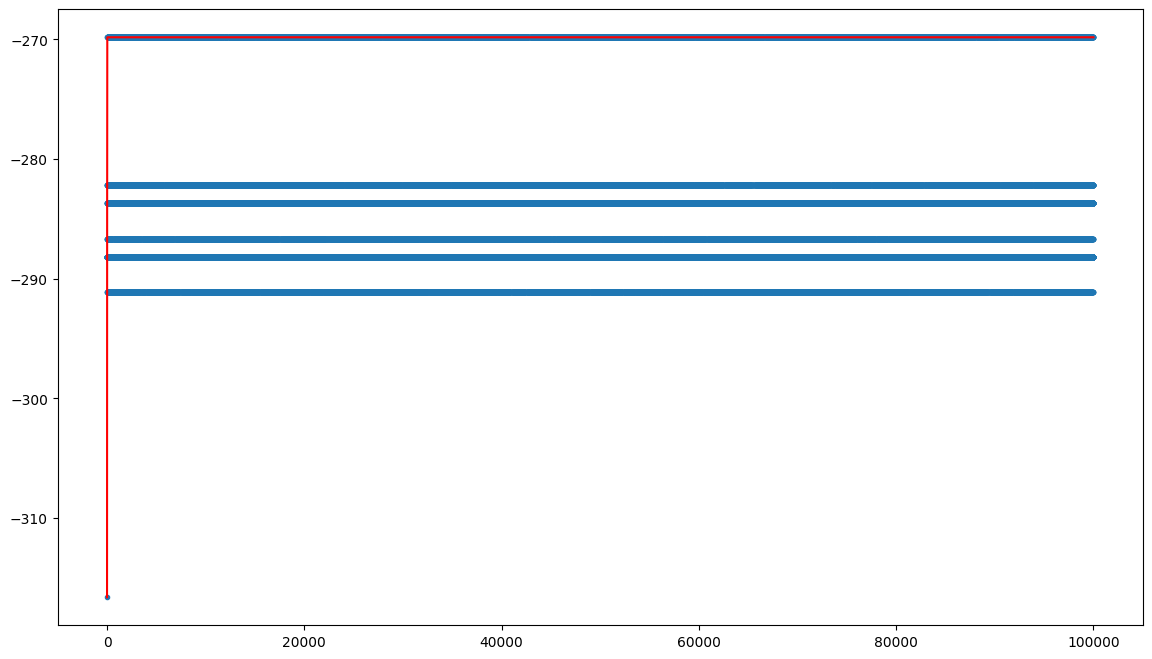

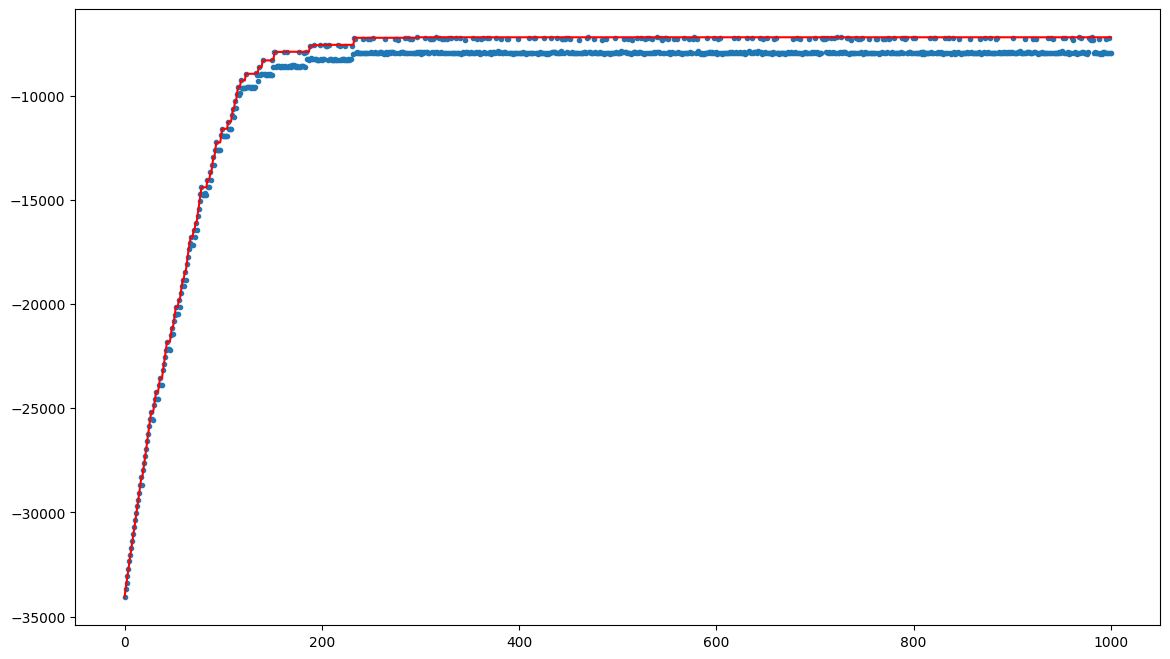

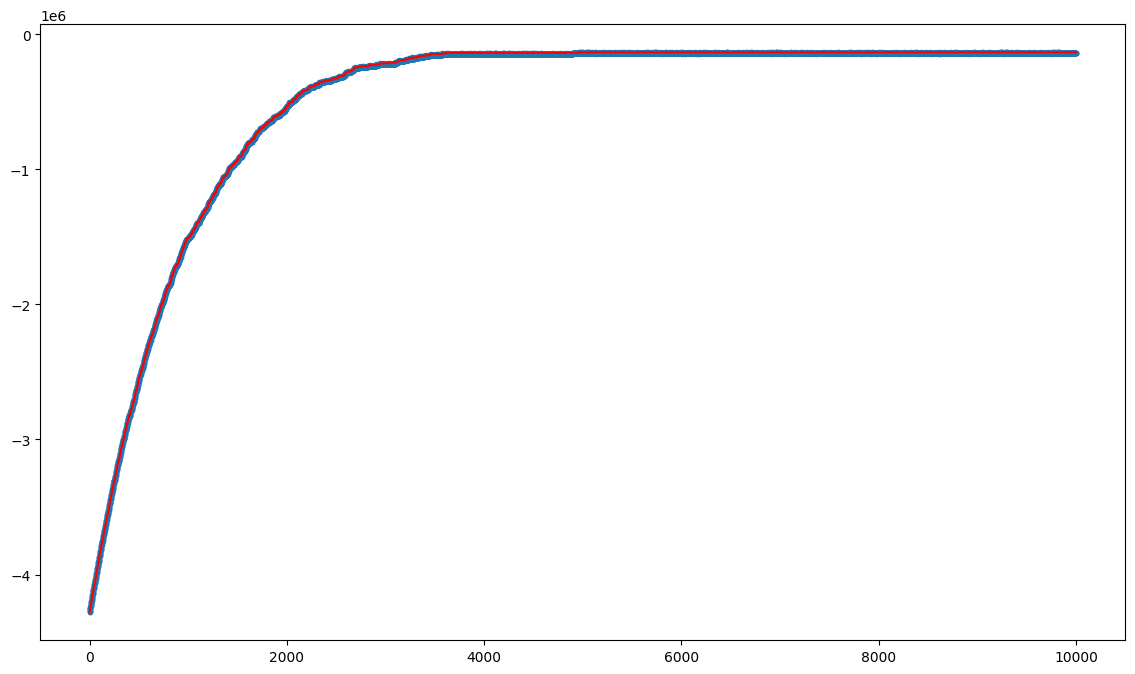

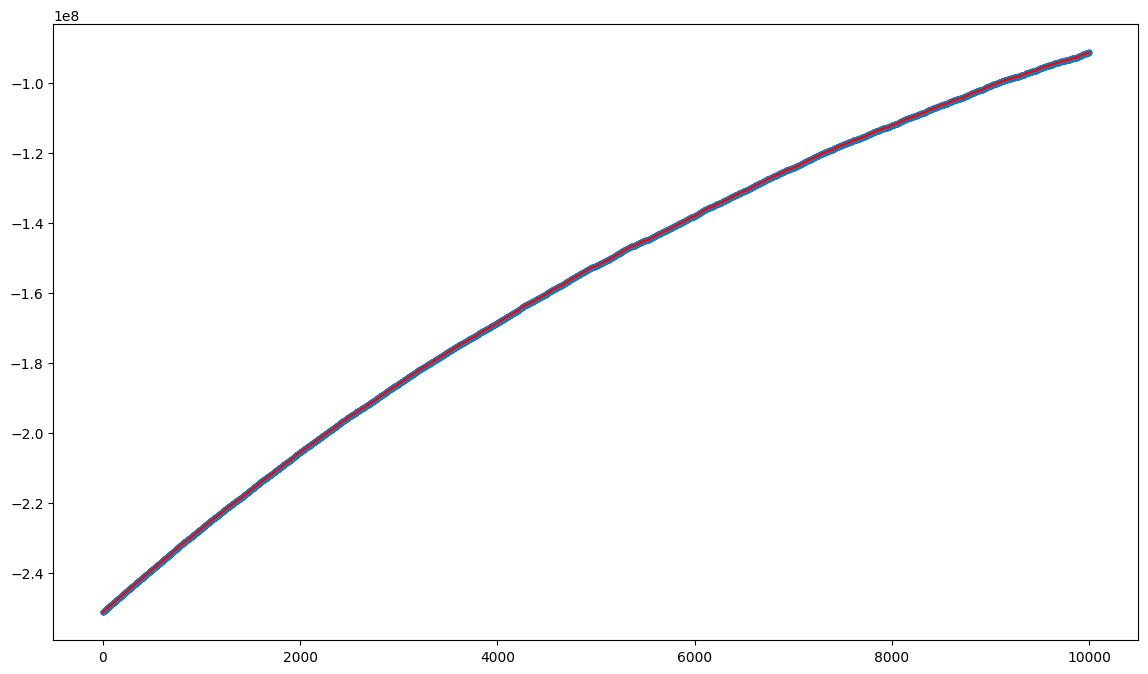

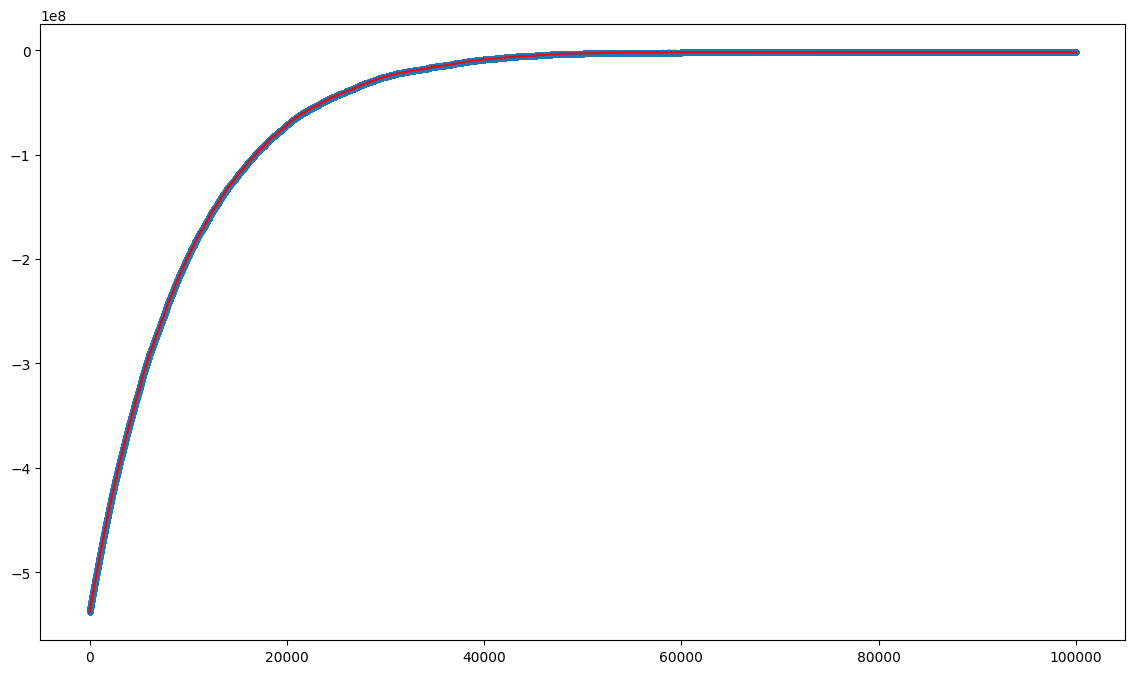

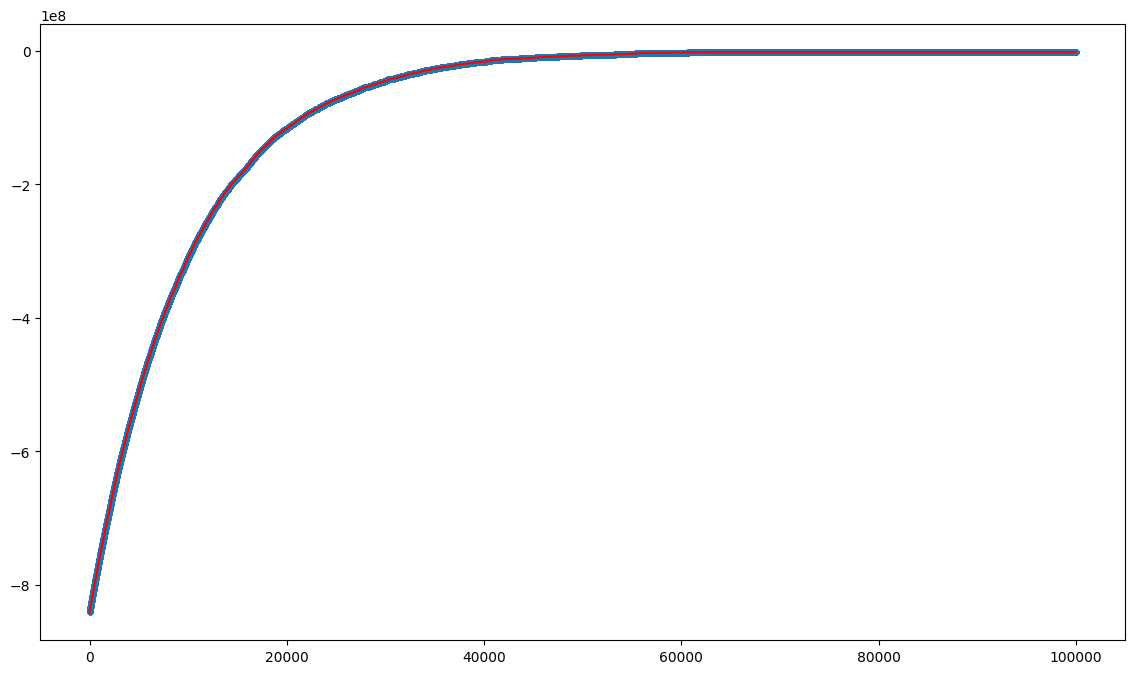

In [8]:
for instance in range(samples):
## Hill Climbing with single mutation
    solution = rng[instance].random(NUM_SETS[instance]) < 1
    sol_fitness = fitness(solution, instance)
    ic ( sol_fitness)
    history = [sol_fitness[1]]

    tweak = single_mutation
    last_step = 0
    step_ranges = (1000, 10_000, 100_000)
    if instance == 1:
        actual_range = step_ranges[0]
    elif instance > 1 and instance < 4:
        actual_range = step_ranges[1]
    else:
        actual_range = step_ranges[2]

    for steps in range(actual_range):
        new_solution = tweak(solution, instance)
        new_fitness = fitness(new_solution, instance)
        history.append(new_fitness[1])
        
        if new_fitness > sol_fitness:
            solution = new_solution
            sol_fitness = new_fitness
            last_step = steps

    plt.figure(figsize=(14,8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color='red'
    )
    _ = plt.scatter(range(len(history)), history, marker='.')

    ic (fitness(solution, instance), last_step)